In [36]:
import getpass
import oracledb
import pandas as pd
import pandasql as ps
import csv
import matplotlib.pyplot as plt

In [37]:
p_username = "system"
p_password = "0034"
p_dns = "localhost/xe"
p_port = "1521"

In [38]:
# Función de conexión y comprobación
con = oracledb.connect(user=p_username, password=p_password, dsn=p_dns, port=p_port)
print("Conectado")

Conectado


In [74]:
#QUERY No.3
cur = con.cursor()
#Mostrar la lista de personas con la fecha de su última aportación y tengan menos de 3 aportaciones ya que si no supera este
#número la persona no puede contar con el servicio médico
query = '''SELECT TB_PERSONA.VAR_NOMBRE_PERSONA, TB_APORTACION.DT_FECHA_APORTACION, TB_APORTACION.INT_NO_APORTACION
FROM TB_PERSONA
INNER JOIN TB_TRABAJO on TB_TRABAJO.VAR_ID_PERSONA = TB_PERSONA.VAR_ID_PERSONA
INNER JOIN TB_APORTACION on TB_TRABAJO.VAR_ID_APORTACION = TB_APORTACION.VAR_ID_APORTACION
WHERE TB_APORTACION.INT_NO_APORTACION < 3 '''
# Variab
cursor = cur.execute(query)
# Generamos el dataframe con la etiqueta de nuestras columnas
df = pd.DataFrame(cursor, columns = ['Nombre','FechaAportacion','NoAportacion'])
# Cierre de conexión
cur.close()

In [75]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Nombre,FechaAportacion,NoAportacion
0,Kristen Cummings,2021-09-07,2
1,Austin Brewer,2020-11-06,1
2,Danielle Rodriguez,2022-03-14,0
3,Belinda Webb,2021-02-22,1
4,Miss Taylor Smith,2021-02-01,0
...,...,...,...
145,April Ellis,2020-09-17,0
146,Brandon Brown,2021-08-06,0
147,Michael Brown,2020-04-22,0
148,Andrew Neal,2020-06-06,0


Text(0, 0.5, 'Personas')

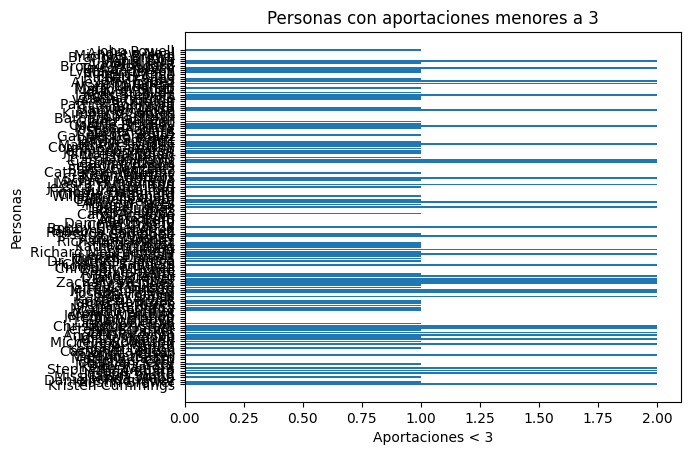

In [76]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.barh(df['Nombre'], df['NoAportacion'])     
# Asignaremos los valores que corresponderán al gráfico
plt.title('Personas con aportaciones menores a 3')      
ax = plt.subplot()    
ax.set_xlabel('Aportaciones < 3') 
ax.set_ylabel('Personas')

In [59]:
#QUERY No.5
cur = con.cursor()
#Se necesita saber la cantidad de personas que están afiliadas y las que son pensionistas en el sistema para así tener 
#cálculo de los usuarios que tienen servicio en el Instituto IESS de todo el país.
query = '''SELECT TB_AFILIACION.VAR_NOMBRE_AFILIACION, 
COUNT (TB_PERSONA.VAR_ID_PERSONA) AS "Cantidad Usuarios"
FROM TB_PERSONA
INNER JOIN TB_TRABAJO ON TB_PERSONA.VAR_ID_PERSONA = TB_TRABAJO.VAR_ID_PERSONA
INNER JOIN TB_AFILIACION ON TB_AFILIACION.VAR_ID_AFILIACION =TB_TRABAJO.VAR_ID_AFILIACION
GROUP BY TB_AFILIACION.VAR_NOMBRE_AFILIACION '''
# Asignamos a una variable el resultado de la ejecución de nuestra búsqueda
resultado = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(resultado, columns = ['Afiliacion','CantidadUsuarios'])
# Cerramos la función de conexión
cur.close()

In [60]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Afiliacion,CantidadUsuarios
0,Asegurado,981
1,Voluntario,4019


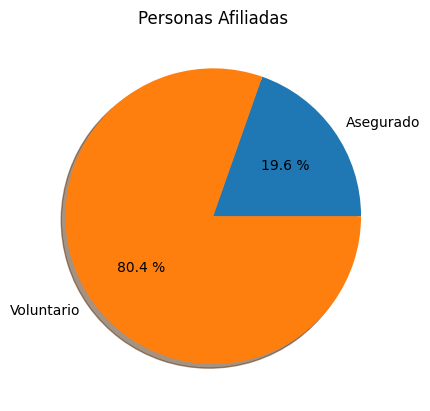

In [64]:
# Generaremos un gráfico de pastel con la función plt.pie
# Separaremos del gráfico a los valores mayores de nuestro resultado
myexplode = [0, 0]
# Asignaremos los valores que corresponderán al gráfico
plt.pie(df["CantidadUsuarios"], labels=df["Afiliacion"],explode = myexplode,shadow=True,autopct="%0.1f %%")
plt.title('Personas Afiliadas')
plt.show()

In [69]:
#QUERY No.7
cur = connection.cursor()
#Quiénes son las personas de Pichincha que han realizado aportaciones menores a 55 dólares y la fecha en que realizaron dicha aportación,
#esto para realizar cálculos de de lo que al afiliado le corresponde entregar un aporte al IESS del 9,45% de su sueldo o salario; 
#mientras que al empleador, el 11,15% del salario del trabajador.
query = '''SELECT TB_PERSONA.VAR_NOMBRE_PERSONA, TB_PERSONA.VAR_PROVINCIA_PERSONA,
TB_APORTACION.VAR_MONTO_APORTACION AS "MONTO APORTACION",
TB_APORTACION.DT_FECHA_APORTACION AS "FECHA APORTACION"
FROM TB_PERSONA
INNER JOIN TB_TRABAJO ON TB_TRABAJO.VAR_ID_PERSONA=TB_PERSONA.VAR_ID_PERSONA
INNER JOIN TB_APORTACION ON TB_TRABAJO.VAR_ID_APORTACION=TB_APORTACION.VAR_ID_APORTACION
WHERE TB_APORTACION.VAR_MONTO_APORTACION < 60 AND TB_PERSONA.VAR_PROVINCIA_PERSONA = 'Pichincha' '''
cursor = cur.execute(query)
# Generamos el dataframe para que guarde nuestra variable resultado con las columnas devueltas por la búsqueda
df = pd.DataFrame(cursor, columns = ['Nombre','Provincia','MontoAportacion','Fecha Aportacion'])
# Cerramos la función de conexión
cur.close()

In [70]:
# Asignamos a filas el número de filas devueltas por nuestra búsqueda
filas = df.shape[0]
# Desplegamos la tabla
df.head(filas)

,Nombre,Provincia,MontoAportacion,Fecha Aportacion
0,Belinda Webb,Pichincha,039,2021-02-22
1,Ellen Flores,Pichincha,045,2022-09-20
2,Melissa Leonard DDS,Pichincha,011,2022-01-30
3,Connie Wilson,Pichincha,016,2021-06-06
4,Danielle Johnson,Pichincha,008,2020-05-28
5,Joseph Aguirre,Pichincha,006,2021-02-03


Text(0, 0.5, 'Persona')

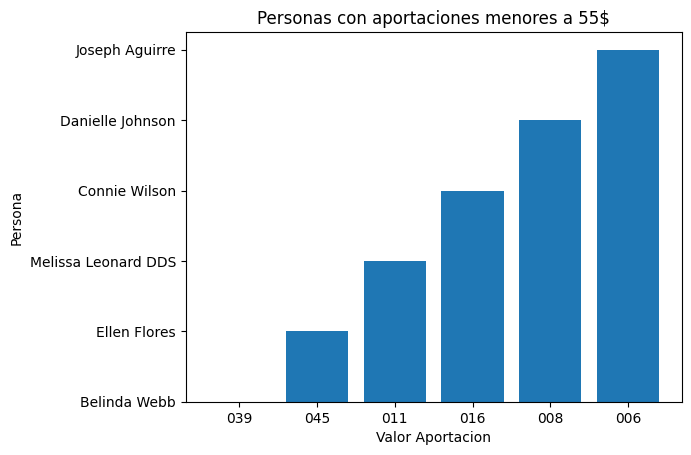

In [73]:
# Iniciamos la figura de barra a graficar
plt.figure()    
# Asignamos valores para los ejes X y Y
plt.bar(df['MontoAportacion'], df['Nombre'])      
# Asignaremos los valores que corresponderán al gráfico
plt.title('Personas con aportaciones menores a 55$')      
ax = plt.subplot()    
ax.set_xlabel('Valor Aportacion') 
ax.set_ylabel('Persona')